# Phylogenetic Tree

In [ ]:
!pip3 install biopython
import math
from collections import defaultdict
from io import StringIO
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix
import numpy as np
from Bio import SeqIO, Phylo
import pylab as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip '/content/UK-Coronavirus-Data.zip'

Archive:  /content/UK-Coronavirus-Data.zip
replace UK Coronavirus Data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: UK Coronavirus Data/.DS_Store  
  inflating: __MACOSX/UK Coronavirus Data/._.DS_Store  
  inflating: UK Coronavirus Data/Coronavirus Samples/England (DEC052020)/HCOV19-ENGLAND-051220-A.fasta  
  inflating: __MACOSX/UK Coronavirus Data/Coronavirus Samples/England (DEC052020)/._HCOV19-ENGLAND-051220-A.fasta  
  inflating: UK Coronavirus Data/Coronavirus Samples/England (DEC052020)/HCOV19-ENGLAND-051220-D.pim  
  inflating: __MACOSX/UK Coronavirus Data/Coronavirus Samples/England (DEC052020)/._HCOV19-ENGLAND-051220-D.pim  
  inflating: UK Coronavirus Data/Coronavirus Samples/England (DEC052020)/HCOV19-ENGLAND-051220.fasta  
  inflating: __MACOSX/UK Coronavirus Data/Coronavirus Samples/England (DEC052020)/._HCOV19-ENGLAND-051220.fasta  
  inflating: __MACOSX/UK Coronavirus Data/Coronavirus Samples/._England (DEC052020)  
  inflating: UK Coronavirus Data/Cor



---


### **1A**
Reading the FASTA file for the aligned version of the sequences from November 27th data set: HCOV19-ENGLAND-271120-A.fasta. The data is formatted into a numpy matrix of size 100 x 3822 (nucleotide matrix), with each character representing a nucleotide.

In [ ]:
# Using the parse function of SeqIO module, I parse the FASTA file
# I extract the spike protein and append the nucleotides to an array
def question_1_a():
    records = list(SeqIO.parse("UK Coronavirus Data/Coronavirus Samples/England (NOV272020)/HCOV19-ENGLAND-271120-A.fasta","fasta"))
    
    arr = []
    for record in records:
        spike = record[21563:25385]
        arr.append(spike)

    matrix = np.array(arr)
    return matrix

question_1_base_matrix = question_1_a()



---

### **1B**

Detecting any characters in the sequences other than ‘A’, ‘T’, ‘C’, ‘G’, and ‘-’, in the nucleotide matrix, and converting all of them to ‘-’. (Note: This is not a standard practice, it is done for simplicity.)

In [ ]:
# First, traverse the matrix to detect the outlier indexes
# Then, traverse again to replace the outliers
def question_1_b(matrix):
    outliers = []
    for row_num, row in enumerate(matrix):
        for col_num, char in enumerate(row):
            if char not in ['A', 'T', 'G', 'C', '-']:
                outliers.append((row_num, col_num))
    
    for row_num, col_num in outliers:
        matrix[row_num][col_num] = '-'

    return matrix

question_1_cleaned_matrix = question_1_b(question_1_base_matrix)



---

### **1C**

Taking the first 25 samples from November 27th data set, and visualizing the first 250 nucleotides of the spike protein gene in the form of a color matrix, such that each nucleotide is represented by a different color and empty characters are left white.

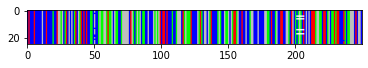

In [ ]:
def question_1_c(matrix):

    # Create a 25x250x3 matrix representing RGB colors for each nucleotide in the matrix
    arr = np.empty((25, 250, 3), dtype=np.uint8)

    # Traverse the first 250 nucleotides if the first 25 sequences
    # assign desired colors: empty -> white, A -> green, T-> blue, G-> red, C-> grey
    for i in range(0, 25):
        for j in range(0, 250):
            char = matrix[i][j]
            if char == '-':
                color = (255, 255, 255)
            elif char == 'A':
                color = (0, 255, 0)
            elif char == 'T':
                color = (0, 0, 255)
            elif char == 'G':
                color = (255, 0, 0)
            else:
                color = (190, 190, 190)
            arr[i][j] = color
    
    # visualize the color map
    plt.imshow(arr.astype(np.uint8))
    plt.show()

question_1_c(question_1_cleaned_matrix)



---

### **1D**

Observations regarding the resulting visualization, commenting on the similarities and differences nucleotide sequences. 


The sequences seem very similar. Color map is a good way to see the differences. 

For example, I noticed that the most differentiated region is around nucleotide 50. It can be easily seen by the color map that the differentiaton in that region is between nucleotides T and C (blue and grey).

Also, in some sequences, some nucleotides right after nucleotide 200 are missing. Those missing nucleotide parts are seen as white lines along the x axis. 

I realized another outlier around nucleotide 240 visible in the bottom part of the color map, probably in 20th sequence. It is seen as a blue dot in a red line.

Those outliers might be mutations.

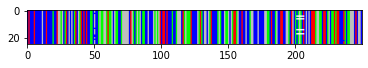

In [ ]:
def question_1_d():
  question_1_c(question_1_cleaned_matrix)
  pass
question_1_d()



---

### **1E**

Using all November 27th spike protein data (of size 100 x 3822), read and transformed in 1a-b, computing the entropy score for these sequences, by implementing this function.

In [ ]:
# Entropy of sequence is calculated using the counts of characters at each nucleotide index
# Entropy of all data is the sum of entropies
def question_1_e(matrix):
    total_entropy = 0
    for c in range(0, 100):
        entropy = 0
        counts = defaultdict(int)
        for row in matrix:
            char = row[c]
            counts[char] += 1
        for char, count in counts.items():
            p = count / 100
            entropy -= p * math.log(p)
        print(f'Entropy for sequence {c} = {entropy}')
        total_entropy += entropy

    print(f'Total entropy = {total_entropy}')

question_1_e(question_1_cleaned_matrix)

Entropy for sequence 0 = 0.0
Entropy for sequence 1 = 0.0
Entropy for sequence 2 = 0.0
Entropy for sequence 3 = 0.0
Entropy for sequence 4 = 0.0
Entropy for sequence 5 = 0.0
Entropy for sequence 6 = 0.0
Entropy for sequence 7 = 0.0
Entropy for sequence 8 = 0.0
Entropy for sequence 9 = 0.0
Entropy for sequence 10 = 0.0
Entropy for sequence 11 = 0.0
Entropy for sequence 12 = 0.0
Entropy for sequence 13 = 0.0
Entropy for sequence 14 = 0.0
Entropy for sequence 15 = 0.0
Entropy for sequence 16 = 0.0
Entropy for sequence 17 = 0.0
Entropy for sequence 18 = 0.0
Entropy for sequence 19 = 0.0
Entropy for sequence 20 = 0.0
Entropy for sequence 21 = 0.0
Entropy for sequence 22 = 0.0
Entropy for sequence 23 = 0.0
Entropy for sequence 24 = 0.0
Entropy for sequence 25 = 0.0
Entropy for sequence 26 = 0.0
Entropy for sequence 27 = 0.0
Entropy for sequence 28 = 0.0
Entropy for sequence 29 = 0.0
Entropy for sequence 30 = 0.0
Entropy for sequence 31 = 0.0
Entropy for sequence 32 = 0.0
Entropy for sequence



---

### **2 BASE**

Using the aligned version of the data, extracting the spike protein gene from the first 4 patients of the samples from November 3, November 27, and December 8 and formating the data into a numpy matrix. Repeating the conversion in 1b on these sequences.

In [ ]:
def question_2_base():
    arr = []

    records = list(SeqIO.parse("UK Coronavirus Data/Coronavirus Samples/England (NOV032020)/HCOV19-ENGLAND-031120-A.fasta","fasta"))
    for record in records[:4]:
        spike = list(str(record[21563:25385].seq))
        arr.append(spike)
    
    records = list(SeqIO.parse("UK Coronavirus Data/Coronavirus Samples/England (NOV272020)/HCOV19-ENGLAND-271120-A.fasta","fasta"))
    for record in records[:4]:
        spike = list(str(record[21563:25385].seq))
        arr.append(spike)
    
    records = list(SeqIO.parse("UK Coronavirus Data/Coronavirus Samples/England (DEC082020)/HCOV19-ENGLAND-081220-A.fasta","fasta"))
    for record in records[:4]:
        spike = list(str(record[21563:25385].seq))
        arr.append(spike)

    matrix = np.array(arr)
    converted_matrix = question_1_b(matrix)
    return converted_matrix

question_2_base_matrix = question_2_base()


**HELPER PRINT FUNCTION**

In [ ]:
def print_matrix(matrix):
    last_row = '     '
    for i, row in enumerate(matrix):
        row_str = f'{i}      ' [:5]
        last_row += f'{i}      ' [:6]
        for j, ele in enumerate(row):
            if i < j:
                row_str += '   '
            else:
                row_str += "%.2f" % ele
            row_str += '  '

        print(row_str)
    print(last_row)

In [ ]:
# turns numpy distance matrix to DistanceMatrix
def distance_matrix_to_phylo(distance_matrix):
    res_distance_matrix = []
    names = []
    for i, row in enumerate(distance_matrix):
        names.append(str(i))
        row_arr = []
        for j, ele in enumerate(row):
            if i < j:
                continue
            else:
                row_arr.append(ele)
        res_distance_matrix.append(row_arr)
    distance_matrix = DistanceMatrix(names=names, matrix=res_distance_matrix)
    return distance_matrix



---

### **2A**

Using percent identity score to compute the pairwise alignment score between all pairs of nucleotide sequences, and using these to fill a pairwise similarity matrix of size 12 x 12.

In [ ]:
def question_2_a(matrix):
    similarity_matrix = []

    # for each nucleotide, compate with all other nucleotides
    # the score for a nucleotide pair is number of matching characters / number of characters
    # append those scores in a matrix
    for i in range(0, len(matrix)):
        row = []
        for j in range(0, len(matrix)):
            seq_1 = matrix[i]
            seq_2 = matrix[j]
            exact_matches = 0
            for c_1, c_2 in zip(seq_1, seq_2):
                if c_1 == c_2:
                    exact_matches += 1
            score = exact_matches / len(seq_1)
            row.append(score)
        similarity_matrix.append(row)
    matrix = np.array(similarity_matrix)

    # print the similarity matrix in lower triangle form with 2 digit precision
    print('Pairwise Similarity Matrix')
    print_matrix(matrix)
    
    # Comment out if you want to print pytho DistanceMatrix with exact precision
    # print(distance_matrix_to_phylo(matrix))
    
    return matrix

question_2_similarity_matrix = question_2_a(question_2_base_matrix)

Pairwise Similarity Matrix
0    1.00                                                         
1    0.87  1.00                                                    
2    0.87  1.00  1.00                                               
3    0.91  0.92  0.92  1.00                                          
4    0.88  0.89  0.89  0.93  1.00                                     
5    0.93  0.94  0.94  0.98  0.95  1.00                                
6    0.93  0.94  0.94  0.98  0.95  1.00  1.00                           
7    0.93  0.94  0.94  0.98  0.95  1.00  1.00  1.00                      
8    0.88  0.89  0.89  0.92  1.00  0.95  0.95  0.95  1.00                 
9    0.86  0.88  0.88  0.91  0.88  0.94  0.94  0.94  0.88  1.00            
10   0.88  0.99  0.99  0.93  0.90  0.95  0.95  0.95  0.90  0.89  1.00       
11   0.93  0.94  0.94  0.98  0.95  1.00  1.00  1.00  0.95  0.94  0.95  1.00  
     0     1     2     3     4     5     6     7     8     9     10    11    




---

### **2B**

Converting the pairwise similarity matrix to a pairwise distance matrix.

In [ ]:
def question_2_b(similarity_matrix):
    # convert similarity matrix to distance matrix by subtracting every element from 1
    distance_matrix = []
    for row in similarity_matrix:
        distance_row = []
        for similarity_score in row:
            distance_row.append(1 - similarity_score)
        distance_matrix.append(distance_row)
    matrix = np.array(distance_matrix)
    
    # print the distance matrix in lower triangle form with 2 digit precision
    print('Distance Matrix')
    print_matrix(matrix)

    # Comment out if you want to print pytho DistanceMatrix with exact precision
    # print(distance_matrix_to_phylo(matrix))
    
    return matrix

question_2_distance_matrix = question_2_b(question_2_similarity_matrix)

Distance Matrix
0    0.00                                                         
1    0.13  0.00                                                    
2    0.13  0.00  0.00                                               
3    0.09  0.08  0.08  0.00                                          
4    0.12  0.11  0.11  0.07  0.00                                     
5    0.07  0.06  0.06  0.02  0.05  0.00                                
6    0.07  0.06  0.06  0.02  0.05  0.00  0.00                           
7    0.07  0.06  0.06  0.02  0.05  0.00  0.00  0.00                      
8    0.12  0.11  0.11  0.08  0.00  0.05  0.05  0.05  0.00                 
9    0.14  0.12  0.12  0.09  0.12  0.06  0.06  0.06  0.12  0.00            
10   0.12  0.01  0.01  0.07  0.10  0.05  0.05  0.05  0.10  0.11  0.00       
11   0.07  0.06  0.06  0.02  0.05  0.00  0.00  0.00  0.05  0.06  0.05  0.00  
     0     1     2     3     4     5     6     7     8     9     10    11    




---

### **2C**

Implementing the neighbor joining algorithm without using any third-party software and using it construct a phylogenetic tree of the given 12 samples. Printing the tree in the Newick format with distances and leaf names. 



In [ ]:
def question_2_c(distance_matrix):

    res_dist = {}
    # convert the distance matrix to dictionary
    # the res dictionary keeps dinstances between different clusters
    res = defaultdict(dict)
    for i in range(len(distance_matrix)):
        for j in range(len(distance_matrix)):
            res[i][j] = distance_matrix[i][j]
    
    # while there are multiple clusters, try to join them
    while len(res)>1:

        # first, find the clusters with the lowest distance, save their index
        min_distance = 1
        min_index = (0, 0)
        for i, distances_dict in res.items():
            for j, distance in distances_dict.items():
                if not i == j and distance < min_distance:
                    min_distance = distance
                    min_index = (i, j)
        res_dist[min_index] = min_distance
        print(f'Clustering {min_index[0]} and {min_index[1]} with distance {min_distance}')

        # then, pop those clusters from the res dictionary because they are merged
        old_row_1 = res.pop(min_index[0], None)
        old_row_2 = res.pop(min_index[1], None)

        # then, for each cluster, pop the differences with the removed clusters
        # also, for each cluester, calculate the difference between the newly-formed cluster and add
        for i, distances_dict in res.items():
            val_1 = distances_dict.pop(min_index[0], None)
            val_2 = distances_dict.pop(min_index[1], None)
            distances_dict[min_index] = (val_1 + val_2) / 2

        # calculate the difference between newly formed cluster and all other clusters
        clusters = list(res.keys())
        new_row = {min_index: 0}
        for cluster in clusters:
            new_row[cluster] = (old_row_1[cluster] + old_row_2[cluster]) / 2
        res[min_index] = new_row

    # The key is the final arrangement
    tree_str = str(list(res.keys())[0])
    print(tree_str)
    return tree_str

question_2_tree =  question_2_c(question_2_distance_matrix)

Clustering 5 and 6 with distance 0.0007849293563578774
Clustering 11 and (5, 6) with distance 0.0009157509157509125
Clustering 7 and (11, (5, 6)) with distance 0.001242804814233417
Clustering 1 and 2 with distance 0.0013082155939299067
Clustering 4 and 8 with distance 0.0028780743066457726
Clustering 10 and (1, 2) with distance 0.011643118785975959
Clustering 3 and (7, (11, (5, 6))) with distance 0.02230507587650446
Clustering (4, 8) and (3, (7, (11, (5, 6)))) with distance 0.06395538984824697
Clustering (10, (1, 2)) and ((4, 8), (3, (7, (11, (5, 6))))) with distance 0.08585573652537937
Clustering 9 and ((10, (1, 2)), ((4, 8), (3, (7, (11, (5, 6)))))) with distance 0.10658277734170592
Clustering 0 and (9, ((10, (1, 2)), ((4, 8), (3, (7, (11, (5, 6))))))) with distance 0.12524324633699635
(0, (9, ((10, (1, 2)), ((4, 8), (3, (7, (11, (5, 6))))))))




---

### **2D**

Using the Newick formatted tree as an input, visualizing the phylogenetic tree for the 12 samples, using the Phylo module of Biopython package.

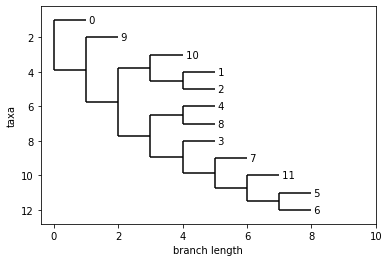

In [ ]:
def question_2_d(tree_str):
    
    tree = Phylo.read(StringIO(tree_str), "newick")
    Phylo.draw(tree)

question_2_d(question_2_tree)




---

### **2E**
Using the pairwise distance matrix as input, using the neighbor joining algorithm provided in the Phylo module to construct a phylogenetic tree, and visualizing it similarly to above.


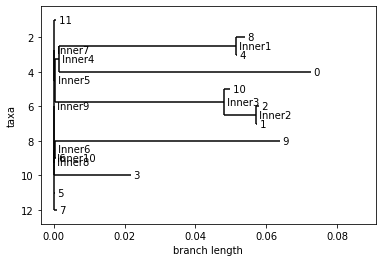

In [ ]:
def question_2_e(distance_matrix):
    constructor = DistanceTreeConstructor()
    distance_matrix = distance_matrix_to_phylo(distance_matrix)
    tree = constructor.nj(distance_matrix)
    Phylo.draw(tree)

question_2_e(question_2_distance_matrix)

### **2F**
Extracting the spike protein gene from all patients from November 3, November 27, and December 8 and format the data into a numpy matrix. Repeat the conversion in 1b on these sequences. Using the Phylo module to construct and visualize the phylogenetic tree of these sequences.


Pairwise Similarity Matrix
0    1.00                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

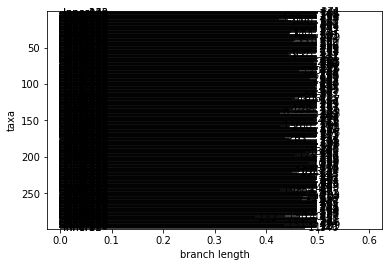

In [ ]:
def question_2_f():
    arr = []

    records = list(SeqIO.parse("UK Coronavirus Data/Coronavirus Samples/England (NOV032020)/HCOV19-ENGLAND-031120-A.fasta","fasta"))
    for record in records:
        spike = record[21563:25385]
        arr.append(spike)

    records = list(SeqIO.parse("UK Coronavirus Data/Coronavirus Samples/England (NOV272020)/HCOV19-ENGLAND-271120-A.fasta","fasta"))
    for record in records:
        spike = record[21563:25385]
        arr.append(spike)

    records = list(SeqIO.parse("UK Coronavirus Data/Coronavirus Samples/England (DEC082020)/HCOV19-ENGLAND-081220-A.fasta","fasta"))
    for record in records:
        spike = record[21563:25385]
        arr.append(spike)
    

    matrix = np.array(arr)
    converted_matrix = question_1_b(matrix)
    distance_matrix = question_2_a(converted_matrix)
    distance_matrix = distance_matrix_to_phylo(distance_matrix)
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(distance_matrix)
    Phylo.draw(tree)
question_2_f()